In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_absolute_error

<h2> Calculates cost with regularization </h2>
<h2> Note that $ \theta_{0} $ is not included in the calculation of cost for regularization in the second summation</h2>
<h1> $$ \frac{1}{2m}( \sum_{i=1}^m (h_{\theta}(x^{(i)})-y^{(i)})^2) + \frac{\lambda}{2m} \sum_{j=1}^n \theta_j^2 $$ </h1>
<h3> where m = number of training examples, $y^{(i)}$ and $x^{(i)}$ are training example i, $\lambda$ is regularization constant </h3>
<h3> $$h_{\theta}(x^{(i)}) = \theta_{0}+\theta_{1}x^{(i)}_{1}+...+\theta_{n}x^{(i)}_{n}$$ </h3>

In [2]:
def calculate_cost(theta, X, y, lbd): # theta is dimensions n x 1, X is dimensions m x n, y is dimensions m x 1
    m = X.shape[0]
    cost = (1/(2*m))*(np.square((np.matmul(X,theta.transpose()) - y))).sum() + (lbd/(2*m)) * np.square(theta).sum() # vectorized implementation of mean squared error as cost function
    cost -= (lbd/(2*m)) * theta[0] ** 2 # theta zero is not regularized
    return cost

<h2> Vectorized implementation gradient calculation together with regularization </h2>
<h2> Note that for $\theta_{0}$, regularization is not needed </h2>
<h1> $$ \frac{\partial J}{\partial \theta_{j}} = \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)})-y^{(i)})x_{j}^{(i)} + \frac{\lambda}{m} \theta_{j}$$ </h1>
<h3> for j = 1,2,...,n where n is the number of weights theta, and m is the number of training examples </h3>

In [3]:
def calculate_grad(theta, X, y, lbd): # theta is dimensions n x 1, X is dimensions m x n, y is dimensions m x 1
    m = X.shape[0]
    grad = (1/m)*(np.matmul(np.matmul(X,theta.transpose()) - y,X) + lbd*theta) # vectorized implementation of gradient
    grad[0] -= (1/m)*lbd*theta[0] # theta_zero is not regularized
    return grad

In [19]:
def linear_reg(X_train, y_train, alpha, lbd, iterations, X_test=None, y_test=None): # X is dimensions m x n, y is dimensions m x 1, alpha is learning rate
    theta = np.random.rand(X_train.shape[1]) # randomly initiates weights
    m = X_train.shape[0]
    costs_train = []
    costs_test = []
    for i in range(iterations):
        costs_train.append(calculate_cost(theta, X_train, y_train, lbd))
        theta -= alpha * calculate_grad(theta, X_train ,y_train, lbd)
        if (X_test is not None and y_test is not None):
            costs_test.append(calculate_cost(theta, X_test, y_test, lbd))
    x_graph = np.arange(0,iterations,1);    
    plt.plot(x_graph,costs_train, label='train') 
    if (X_test is not None and y_test is not None):
        plt.plot(x_graph,costs_test, label='test')
    plt.legend()
    return theta    

In [5]:
def predict(X,theta):
    return np.matmul(X,theta.transpose())

In [6]:
def plot_cost(X, y, theta):
    pred = predict(X,theta)
    plt.scatter(X[:,1],y)
    plt.plot(X[:,1],pred)

In [7]:
def normalize(X, mean, std):
    return (X-mean) / std

<h2> Applying linear regression model on data from kaggle </h2>

In [8]:
df = pd.read_csv("data/kaggle_height_weight_data.csv")
df

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


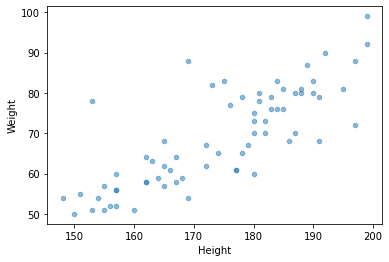

In [9]:
df_height_weight = df.loc[df["Index"] == 2,['Height','Weight']] # get height and weight for normal bmi
df_height_weight.plot.scatter(x="Height", y="Weight", alpha=0.5)

In [10]:
height = df_height_weight['Height'].values
weight = df_height_weight['Weight'].values

In [11]:
X = df_height_weight['Height'].values
normalized_X = normalize(X, X.mean(axis=0), X.std(axis=0))
x_ones = np.ones(X.shape[0])
normalized_X = np.stack((x_ones, normalized_X), 1)
y = df_height_weight['Weight'].values

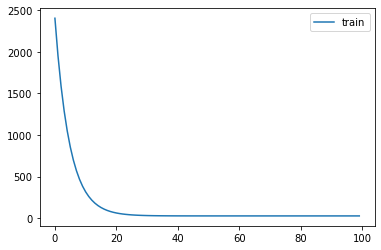

In [12]:
theta = linear_reg(normalized_X, y, 0.1, 0.1, 100)

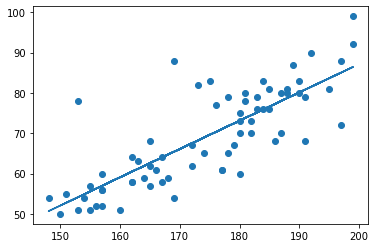

In [13]:
pred = predict(normalized_X,theta)
plt.scatter(X,y)
plt.plot(X,pred)

In [14]:
print(mean_absolute_error(pred,y))

5.284440470562946


In [15]:
height = (173-X.mean(axis=0)) / X.std(axis=0)
print(predict(np.array([1,height]),theta))

68.20180950283819


In [16]:
df = pd.read_csv("data/kaggle_real_estate_prices.csv",index_col=None)
display(df)
display(df.isnull().sum()) # check for nan values

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [17]:
train=df.sample(frac=0.8,random_state=200) #random state is a seed value
test=df.drop(train.index)

train_x = train.loc[:,df.columns != "Y house price of unit area"]
train_y = train.loc[:,"Y house price of unit area"]
test_x = test.loc[:,df.columns != "Y house price of unit area"]
test_y = test.loc[:,"Y house price of unit area"]

train_mean = train_x.mean(axis=0) # mean normalization
train_std = train_x.std(axis=0)
train_x = normalize(train_x,train_mean ,train_std)
test_x = normalize(test_x,train_mean ,train_std )

train_x.insert(0, 'One', 1) # adding column of ones for theta that is independent of features
test_x.insert(0, 'One', 1)

array([38.06033037, -0.59095602,  1.29302486, -3.44991947, -4.84111204,
        2.6980591 ,  3.57121424,  0.52307292])

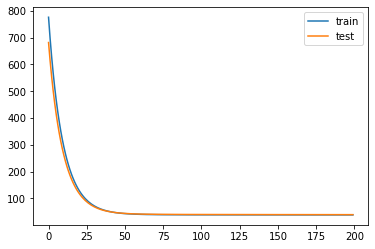

In [22]:
theta = linear_reg(train_x.values, train_y.values, 0.05, 0, 200, test_x.values, test_y.values)
theta

In [23]:
pred = predict(test_x.values, theta)
print(mean_absolute_error(pred,test_y))

6.003968252019347
